# Lab 3 - Visualization, Model and Decision Tree
---
**Summer 2025 - Intructor: Joyce Yang**

**Adapted from teaching materials by Prof. Chris Volinksy Fall 2024.**

***Visualization Part - Original notebook developed 2024 by Krutika Savani***
***Decision Tree Part - Original Notebooks courtesy of Prof. Foster Provost and Rubing Li***

**This notebook focused on data!**

In this notebook, we will walk through
1. Fitting Models
3. Decision Trees

This notebook might be heavy load, work on mandatory task first and then work on optional task if you have time. You won't be penalize if you didn't finish optional task.

Since Lab 2, you’ve learned how to read official documentation.
In this notebook—and the ones that follow—I will **no longer include direct links** to relevant Python function documentation. Instead, I will provide the **names of the necessary functions**.

It is your responsibility to **search for and identify the correct official documentation** (e.g., using Google, not GenAI). I understand that this process might feel time-consuming, but trust me—the payoff is well worth it in the long run.

**Before we begin, remember to save this notebook IN YOUR OWN GOOGLE DRIVE**.  That way you have your own copy to work on, edit and share.

## Fitting Model

One of the powerful ways we use python and pandas is the ease with which we can build powerful predictive models.  The structure follows a basic structure that can be reused to fit many different types of models.   

Lets use a standard data set on features of college students to build a simple model to predict the graduation rate (Y) from the other data available on students (X).

In [67]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import re
from sklearn.tree import plot_tree
# this trick is required to get plots to display inline with the rest of your notebook,
# not in a separate window
%matplotlib inline

### Loading College Data

Recall `College.csv` - download again to your local machine if needed by [clicking on this link](https://www.statlearning.com/s/College.csv).

In [1]:
from google.colab import files
uploaded = files.upload()

Saving College.csv to College.csv


In [24]:
college_df = pd.read_csv("College.csv", index_col=0)

### Data Preprocessing

#### Task 1: Column Rename
Remember that in Lab 2, we rename the columns `S.F.Ratio` to `S_F_Ratio`- removing punctuation to avoid potential problem.
Now let's remove punctuation for all columns in dataset

In [25]:
college_df.columns = [re.sub(r'[^\w\s]', '_', col) for col in college_df.columns]
print(college_df.columns)

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni', 'Expend',
       'Grad_Rate'],
      dtype='object')


#### Task 2: Dummies

We want to fit a simple model predicting `GradRate` based on the other features of the college. Therefore, in this section, we choose **Linear Regression**.

Note that linear regression requires additional data preprocessing because it cannot directly handle categorical data.

Therefore,let's do dummies for all categorical data.

Hint:
1. `get_dummies` in `pandas`. Remember to specify which column is categorical. You can also specify the prefix for all dummies. Also you need to **drop** the first dummy columns with `drop_first` parameters. Linear Regression without `drop` may have errors.

In [26]:
college_dummies = pd.get_dummies(college_df, columns=["Private"], prefix="Private", drop_first=True)


#### Additional Process
Also, we want to make sure our target, GradRate, has reasonable values - aka between 0 and 100. Therefore, the following code drop rows that has invalid value.

In [27]:
bad_cols = (college_df['Grad_Rate'] > 100) | (college_df['Grad_Rate'] < 0)
college_df = college_df[~bad_cols]

### Data Preparation


#### Task 3: What type of task is it?
Given that our task is to build a simple model to predict the mpg of cars (Y) from the other data available on those cars (X).

1. **Is this supervised or unsupervised learning?**
2. **Is this a classification or regression task?**

#####Supervuised learning since we have data from prev car, its a classification

#### Task 4: Features and Target

Now we have a valid dataset to train the model. From the lecture, we know that the model requires input - *features* and output - *target*.

Therefore, we need to create 2 variables.
1. `X` contains all features (predictors)
2. `Y` contains target

In [32]:
Y = college_dummies["Grad_Rate"]
X = college_dummies.drop(columns=["Grad_Rate"])

#### Task 5: Train Test Split

Remember about defining Training and Test sets.  The Training set is used to fit the model and then that model is applied to the Test set to see how good the predictions are.  
- Split data into 80% training and 20% test sets
- Fit the model to the training data to optimize parameters

Now let's split the dataset into 80/20.

Hint:
1. Use the `train_test_split` function in `sklearn` package.
2. This function will split the dataset randomly. To make your split reproducible (for either debug purpose or reproduction purpose), you can set `random_state`. Let's say `random_state=123`.

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 123)

### Fitting a Linear Regression Model

#### Task 6: Fitting Model

1. We need to import the predictive model class that we'll use - linear regression. The `LinearRegression` class from `sklearn.linear_model`
2. Instantiate the model. `LinearRegression()`
3. Fit the regression model with the TRAINING DATA. Check the `fit()` function.

In [40]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### Task 7: Coefficient
What's the coefficient of your trained model?

Hint: The model's coefficient can be shown with `coef_`.

In [41]:
print(model.coef_)

[ 9.30964624e-04 -2.49162683e-04  4.61740596e-03  4.12379073e-02
  1.82212650e-01 -9.52621523e-04 -1.47345142e-03  1.13341003e-03
  1.87353081e-03 -1.31252724e-03 -1.53610308e-03  7.14079156e-02
 -1.09440427e-01  2.56207752e-01  2.47605645e-01 -4.03091295e-04
  3.46995874e+00]


### Evaluating the Model

That's it!  This same structure applies to all data science models and now you can fit some of the most powerful models out there with this simple code! 💪 💻

Now we get to see how well the model performs.  One way to do evaluation is to numerically compare the predictions ON THE TEST SET to the actual values in the test set.

This is a regression problem so our predictions are numeric.  We can compare the prediction and the actual using mean absolute error (MAE) or root mean squared error (RMSE).

 [There are many other metrics available too!](https://scikit-learn.org/stable/modules/model_evaluation.html#)

#### Task 8: Predict on Test set
In order to evaluate the model, we first need to get the model predictions from test set.

Hint: `predict()` with Test dataset.

In [45]:
y_pred = model.predict(X_test)
print(y_pred)

[72.03152702 71.13855112 51.41778337 64.81779431 69.76522459 74.75044054
 44.34376763 67.74044299 82.16100113 61.22453943 74.86916317 73.25277387
 61.18618893 65.40105131 66.89752767 70.30104765 62.64740851 86.78212105
 55.91463125 54.86132247 52.08814013 68.80482348 72.99819183 87.59101974
 85.77924018 54.902518   54.82305276 84.84690865 83.95909355 71.80152544
 68.77989176 51.4282069  65.58708602 77.6174921  50.23109257 52.35600545
 53.14866429 52.41466415 62.94383686 58.62930796 79.47727292 65.52265052
 65.20470923 67.70263636 74.60112326 71.58241415 77.6430856  76.55277416
 76.163808   68.43261821 57.24842753 76.13374609 82.39152324 43.989328
 54.76874025 69.41521596 88.48149482 71.46999469 63.88477633 70.26116703
 96.01891744 70.31095344 63.32273381 63.69635076 73.45432901 58.78224132
 59.11756212 68.69235127 83.07176684 62.87476984 62.24142284 84.50662851
 67.02577503 70.13832768 91.75749567 83.54709137 63.95808834 55.74403627
 60.13769465 81.37856425 77.60505847 76.03386449 67.9

#### Task 9: Calculate RMSE
Calculate RMSE

Hint: the RMSE stands for root mean square error has the following equation
$$RMSE = \sqrt{\sum_{i=0}^N(\hat{Y} - Y)^2}$$
where $\hat{Y}$ is the predicted value, Y is the label. $N$ is the number of samples in test dataset.

In [54]:
i = 0
sum = 0
while (i < college_df.shape[0]):
  sum += (y_pred - y_test)**2
  i+=1
sum = sum**.5
print(sum)

Randolph-Macon Woman's College                    112.305347
Guilford College                                  171.000247
University of Wisconsin-Stout                     378.356774
Saint Xavier University                           273.492102
Saint John's University                             6.540086
                                                    ...     
Brandeis University                                27.524924
University of San Francisco                        74.744479
Trinity College CT                                 67.372911
Texas Southern University                        1668.393484
Clinch Valley Coll. of  the Univ. of Virginia     158.227045
Name: Grad_Rate, Length: 156, dtype: float64


#### Task 10: Calculate RMSE via library packages

We can instead use `sklearn.metrics` to calculate evaluation metrics directly.

Hint: `root_mean_squared_error()` function in `sklearn.metrics`. You can also play with `mean_absolute_error`.

In [57]:
rmse = mean_squared_error(y_pred,y_test)
print(rmse)

166.6381657023247


#### Task 11: Calculate RMSE for Training set

What if you were to calculate the RMSE on the TRAINING set?  Do you think it would be higher or lower?

######it would be lower since there was direct fitting to training data

#### Task 12: Visualizing Performance

Now plot the predicted value vs, the true value through scatter plot. Remember to draw a $y=x$ line as perfect line. If you perfectly predict the result, you will end up with such perfect line.

Hint:
1. `scatter` in `matplotlib`.
2. To draw the $y=x$ line, use `plot` and the mark can be `r--`, which stands for red dash.

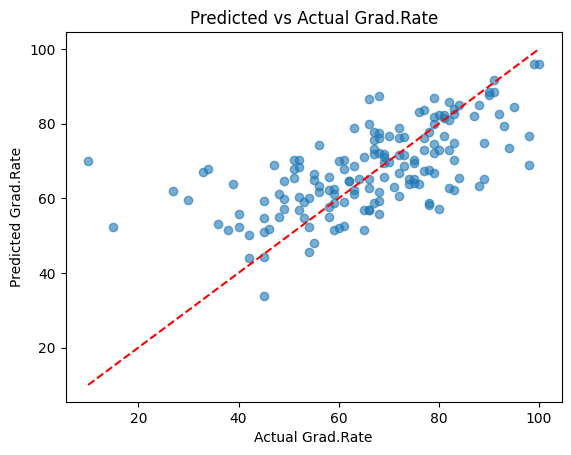

In [60]:

# Scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred, alpha=0.6)

# Draw the perfect prediction line y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Label the axes and add a title
plt.xlabel("Actual Grad.Rate")
plt.ylabel("Predicted Grad.Rate")
plt.title("Predicted vs Actual Grad.Rate")

# Show the plot
plt.show()

#### Task 13: Interpret RMSE
Now can you interpret your RMSE for testing data?

In [ ]:
#average error between predicted and real values

## Decision Tree

In this section, we will learn how to implement decision tree.

Let's build the decision tree with another dataset called Tayko. Download from this [link](https://drive.google.com/file/d/1IaxBOvXbY2AUeG0DSasdnpfXe4GLI6JY/view?usp=sharing)

Task is to predict whether the person made a Purchase  (0,1) given 24 attributes including the source catalog the customer received (encoded in 15 "source" variables) and other customer attributes.  

In [61]:
from google.colab import files
uploaded = files.upload()

Saving Tayko.csv to Tayko.csv


In [62]:
df=pd.read_csv("Tayko.csv")

### Data Preparation

#### Task 14: Data Preparation
Like we have done in previous section. Let's prepare the data.
1. Drop `sequence_number` `Spending` column,
2. Create X and Y, where Y is `Purchase`
3. Do a train test split 80/20.

In [63]:
df = df.drop(['sequence_number', 'Spending'], axis=1)

# Define X (features) and Y (target)
X = df.drop('Purchase', axis=1)
Y = df['Purchase']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Fitting the model

#### Task 15: Train the Tree Model
Now build your tree.
Hint:
1. We need to import the predictive model class `DecisionTreeClassifier` from `sklearn.tree`
2. Instantiate the model `DecisionTreeClassifier()`. Fit a small try by setting `max_depth=3` and `criterion=entropy`
3. Fit the decision tree model with the TRAINING DATA. Check the `fit()` function.

In [66]:
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)

# Fit the model using training data
clf.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

### Evaluation and Interpretation

#### Task 16: Plot Tree
Now let's see how our trained model tree looks like.

Hint:
1. Plot the tree with `plot_tree()`function in `sklearn.tree`
2. Remember to correctly set the predicted class name and feature names.

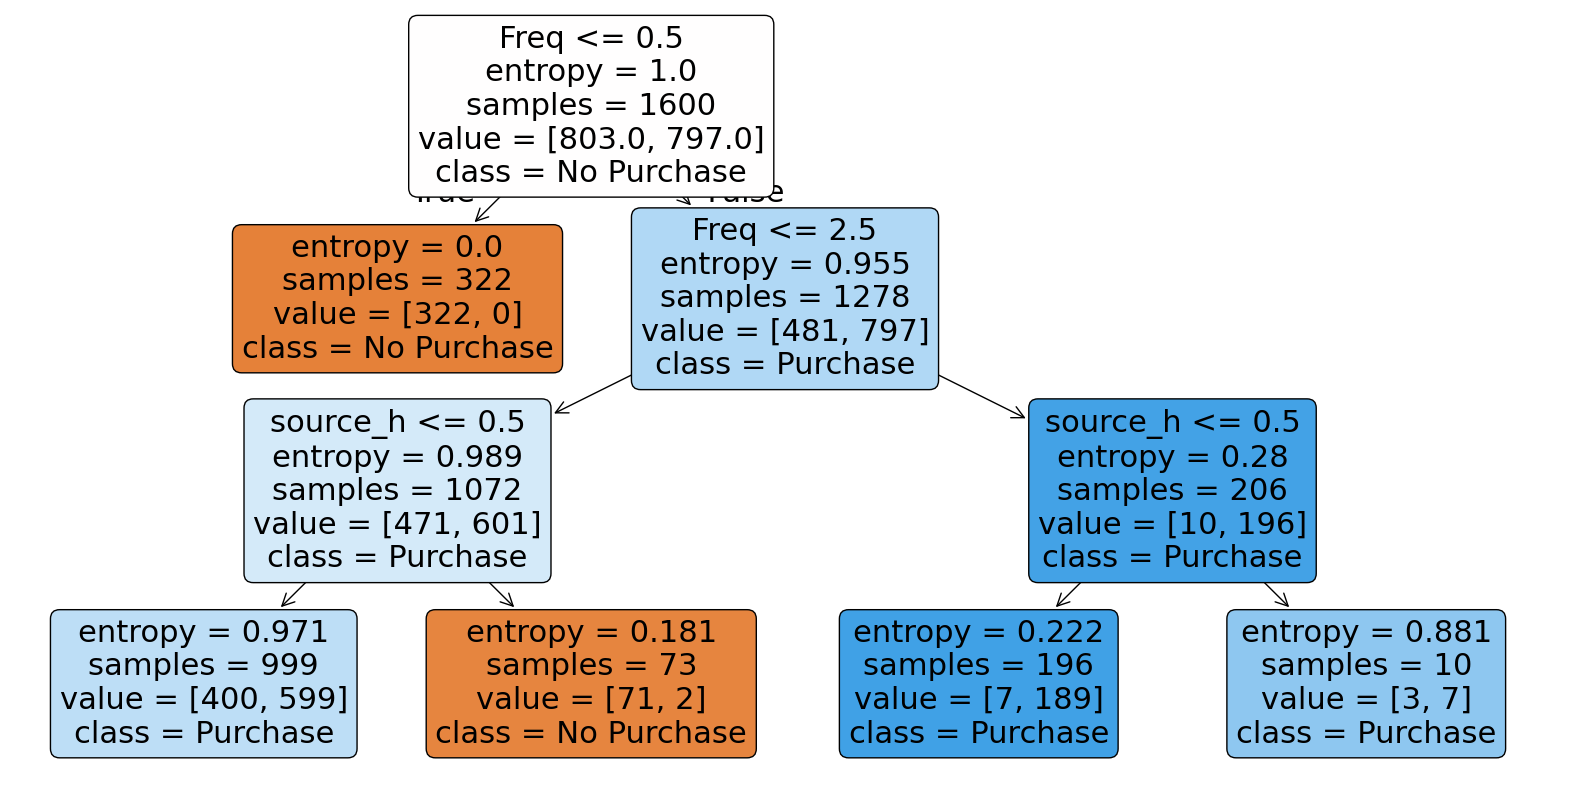

In [68]:
plt.figure(figsize=(20,10))  # Adjust the size as needed
plot_tree(clf,
          feature_names=X.columns,
          class_names=['No Purchase', 'Purchase'],  # Adjust based on your Y labels
          filled=True,
          rounded=True)
plt.show()

#### Task 17: Feature Importance
Which feature is most important? What's the importance score of that feature?

Hint: `feature_importances_`in `DecisionTreeClassifier` will show importance score. You can sort it to see the feature with maximum score.

In [69]:
import pandas as pd

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame for easier viewing
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important feature
print("Most important feature:", feature_importance_df.iloc[0]['Feature'])
print("Importance score:", feature_importance_df.iloc[0]['Importance'])

# (Optional) Display full table
print(feature_importance_df)

Most important feature: Freq
Importance score: 0.8537703017499085
                 Feature  Importance
16                  Freq     0.85377
8               source_h     0.14623
2               source_c     0.00000
3               source_b     0.00000
0                     US     0.00000
1               source_a     0.00000
5               source_e     0.00000
4               source_d     0.00000
7               source_o     0.00000
6               source_m     0.00000
10              source_s     0.00000
11              source_t     0.00000
12              source_u     0.00000
9               source_r     0.00000
13              source_p     0.00000
14              source_x     0.00000
15              source_w     0.00000
17  last_update_days_ago     0.00000
18   1st_update_days_ago     0.00000
19             Web order     0.00000
20           Gender=male     0.00000
21        Address_is_res     0.00000


#### Task 18: Accuracy
How good is your tree on test data? What's the accuracy?

Hint:
1. Predict with model on test data using `fit`
2. Measure accuracy with `sklearn.metrics.accuracy_score`

In [70]:
Y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Print the result
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.74


## [Advanced Coding] Dive into Decision Tree

This section is for you to navigate into details, such as building decision tree from sketch.

### Finding the best splits

**Entropy** ($H$) and **information gain** ($IG$) are useful tools for measuring the effectiveness of a split on the values of one variable for giving information on the value of another variable. Entropy measures how random data is, information gain is a measure of the reduction in randomness after performing a split.

We wrote Python functions to calculate entropy and information gain

In [ ]:
def entropy(target_column):
    """
        computes -sum_i p_i * log_2 (p_i) for each i
    """
    # get the counts of each target value
    target_counts = target_column.value_counts().astype(float).values
    total = target_column.count()
    # compute probas
    probas = target_counts/total
    # p_i * log_2 (p_i)
    entropy_components = probas * np.log2(probas)
    # return negative sum
    return - entropy_components.sum()

def information_gain(df, info_column, target_column, threshold):
    """
        computes H(target) - H(target | info > thresh) - H(target | info <= thresh)
    """
    # split data
    data_above_thresh = df[df[info_column] > threshold]
    data_below_thresh = df[df[info_column] <= threshold]
    # get entropy
    H = entropy(df[target_column])
    entropy_above = entropy(data_above_thresh[target_column])
    entropy_below = entropy(data_below_thresh[target_column])
    # compute weighted average
    ct_above = data_above_thresh.shape[0]
    ct_below = data_below_thresh.shape[0]
    tot = float(df.shape[0])
    return H - entropy_above*ct_above/tot - entropy_below*ct_below/tot

Now that we have a way of calculating $H$ and $IG$, let's test our prior guess as a good split point as a split on `last update days ago` allows us to predict people who will purchase.

In [ ]:
col = "last_update_days_ago"
threshold = 2000 #### You can also try other value
prior_entropy = entropy(y)
IG = information_gain(df, col, "Purchase", threshold)
print ("IG of %.4f - using a threshold of %.2f - given a prior entropy of %.4f" % (IG, threshold, prior_entropy))

IG of 0.0088 - using a threshold of 2000.00 - given a prior entropy of 1.0000


How good was our guess? Let's loop through all possible splits on fare and see what is the best!

In [ ]:
def best_threshold(df, info_column, target_column, criteria=information_gain):
    maximum_ig = 0
    maximum_threshold = 0

    for thresh in df[info_column].unique():
        IG = criteria(df, info_column, target_column, thresh)
        if IG > maximum_ig:
            maximum_ig = IG
            maximum_threshold = thresh

    return (maximum_threshold, maximum_ig)


maximum_threshold, maximum_ig = best_threshold(df, col, "Purchase")

print ("The best split threshold for %s is %.2f - which provides a maximum IG of %.4f." % (col, maximum_threshold, maximum_ig ))

The best split threshold for last_update_days_ago is 2656.00 - which provides a maximum IG of 0.0296.


Other observed features may also give us (strong) clues about survival

So, then ... what feature gives the most effective split?

In [ ]:
def best_split(df, info_columns, target_column, criteria=information_gain):
    maximum_ig = 0
    maximum_threshold = 0
    maximum_column = ""

    for info_column in info_columns:
        thresh, ig = best_threshold(df, info_column, target_column, criteria)

        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = thresh
            maximum_column = info_column

    return maximum_column, maximum_threshold, maximum_ig

max_col, max_threshold, max_ig = best_split(df, X.columns, "Purchase")


print ("The best column to split on is %s giving us a IG of %.4f using a thresh of %.2f" % (max_col, max_ig, max_threshold))

The best column to split on is Freq giving us a IG of 0.2350 using a thresh of 0.00
